<a href="https://colab.research.google.com/github/SeiichiroFukushima/keras/blob/master/LSTM_try04-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data_file='/content/drive/MyDrive/Colab Notebooks/total_0621_MAG_mod.csv'
#csvファイルの読み込み
data=pd.read_csv(data_file).values
#時刻データ{Unnamed: 0.2, Unnamed: 0.1, Unnamed: 0, No., ｶﾒﾗ時間}（一番左側から５つ）は使わないので除去する
data=data[:,5:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
print( data.shape[0], ',', data.shape[1])

#データを入力(X)４つ、出力(Y)２つに分ける
input_data=data[:,1:13]
output_data=data[:,0:1]



803 , 13


In [58]:
output_data

array([[ 54],
       [ 75],
       [181],
       [ 67],
       [ 79],
       [ 77],
       [ 62],
       [104],
       [ 85],
       [ 64],
       [ 59],
       [132],
       [ 93],
       [ 88],
       [ 39],
       [ 46],
       [ 88],
       [122],
       [ 57],
       [ 58],
       [109],
       [ 94],
       [ 68],
       [ 82],
       [ 70],
       [ 84],
       [ 55],
       [ 47],
       [ 85],
       [ 49],
       [ 91],
       [ 98],
       [ 80],
       [ 62],
       [ 60],
       [ 57],
       [ 88],
       [ 45],
       [ 34],
       [ 61],
       [179],
       [141],
       [ 68],
       [ 66],
       [ 63],
       [118],
       [ 79],
       [133],
       [ 63],
       [ 51],
       [ 54],
       [ 45],
       [118],
       [ 64],
       [ 52],
       [ 38],
       [ 79],
       [187],
       [ 92],
       [ 53],
       [ 45],
       [ 49],
       [ 70],
       [ 62],
       [103],
       [105],
       [111],
       [ 92],
       [ 78],
       [138],
       [154],
      

In [59]:
input_data

array([[64127, 58327,  1355, ...,  2844,     0,   324],
       [67973, 51949,  1865, ...,  4062,     0,   491],
       [69083, 52110,  1849, ...,  3373,   291,   460],
       ...,
       [62031, 55063,  1685, ...,  4182,   322,   417],
       [66243, 54089,  1794, ...,  4473,   335,   568],
       [65812, 57355,  1520, ...,  3306,   677,   384]])

In [60]:
Xdata=[]
Ydata=[]
#LSTM用にデータ加工
look_back=5
for i in range(data.shape[0]-look_back):
    Xtimedata=[]
    for j in range(input_data.shape[1]):
        Xtimedata.append(input_data[i:i+look_back,j])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    for j in range(output_data.shape[1]):
        Ytimedata.append(output_data[i+look_back,j])
    Ydata.append(Ytimedata)

In [61]:
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

print(Xdata.shape)
print(Ydata.shape)

(798, 5, 12)
(798, 1)


In [62]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [63]:
train_mean = Xdata.mean()
train_std = Xdata.std()

test_mean = Ydata.mean()
test_std = Ydata.std()

Xdata = (Xdata - train_mean) / train_std
Ydata = (Ydata - test_mean) / test_std

In [64]:
#学習用の情報指定
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
print('Xdim=',Xdim,', Ydim=',Ydim,', validation_split_rate=',validation_split_rate)

Xdim= 12 , Ydim= 1 , validation_split_rate= 0.2


In [65]:
#モデル構築
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(look_back,Xdim)))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(5))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 20)             2640      
                                                                 
 lstm_11 (LSTM)              (None, 5, 10)             1240      
                                                                 
 lstm_12 (LSTM)              (None, 5)                 320       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4,206
Trainable params: 4,206
Non-trainable params: 0
_________________________________________________________________


In [66]:
#学習開始
history=model.fit(Xdata,Ydata,batch_size=16,epochs=200,validation_split=validation_split_rate)

Epoch 1/200
40/40 [==============================] - 8s 40ms/step - loss: 1.1254 - val_loss: 0.5251
Epoch 2/200
40/40 [==============================] - 0s 11ms/step - loss: 1.1194 - val_loss: 0.5227
Epoch 3/200
40/40 [==============================] - 0s 10ms/step - loss: 1.1184 - val_loss: 0.5226
Epoch 4/200
40/40 [==============================] - 0s 12ms/step - loss: 1.1023 - val_loss: 0.5226
Epoch 5/200
40/40 [==============================] - 0s 11ms/step - loss: 1.0528 - val_loss: 0.5061
Epoch 6/200
40/40 [==============================] - 0s 10ms/step - loss: 0.9365 - val_loss: 0.5115
Epoch 7/200
40/40 [==============================] - 0s 11ms/step - loss: 0.8871 - val_loss: 0.5040
Epoch 8/200
40/40 [==============================] - 0s 12ms/step - loss: 0.8855 - val_loss: 0.5625
Epoch 9/200
40/40 [==============================] - 1s 13ms/step - loss: 0.8562 - val_loss: 0.5320
Epoch 10/200
40/40 [==============================] - 0s 11ms/step - loss: 0.8694 - val_loss: 0.5207

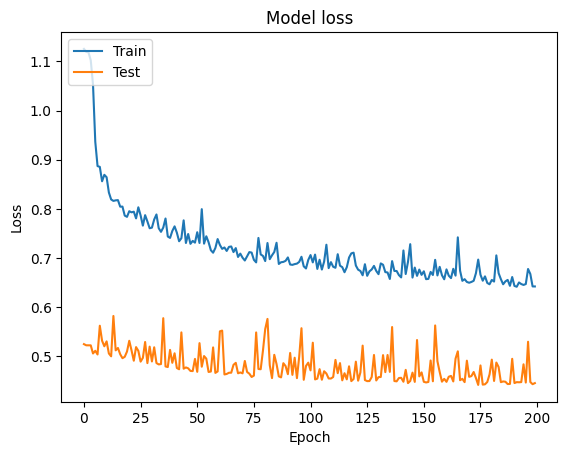

In [68]:
#学習履歴のグラフ化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
#学習データから学習時にテストデータとして用いた部分を取り出す
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]

5/5 [==============================] - 1s 4ms/step


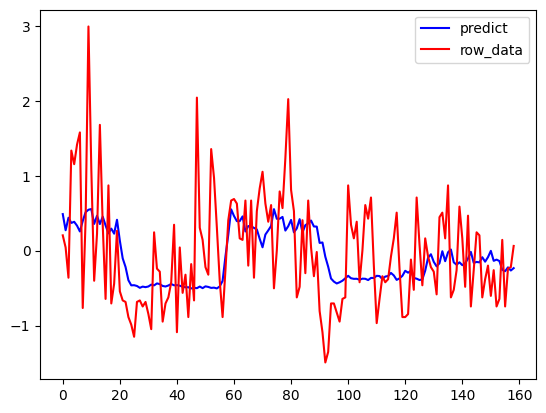

In [70]:
#テスト
Predictdata = model.predict(Xdata_validation)
#テスト結果のグラフ化
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

In [71]:
import pandas as pd
predict_df = pd.DataFrame(Predictdata, columns=["predict"])
validation_df = pd.DataFrame(Ydata_validation, columns=["row_data"])
predict_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_predict_data05.csv", index=False)
validation_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_validation_data05.csv", index=False)
